# K-Means Color Clustering

The goal of this program is to partition and cluster the pixel intentsities of a RGB image. Given any image size of *LxB* pixels and each having thre components Red, Green and Blue.

Here we define the number of clusters of colors we want.

We will use *scikit-learn implementation of K-Means*, *matplotlib* to display out images and most dominant colors, we will use *argparse* to parse the line arguments, and finallt *cv2* to load images and do operations.

In [22]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import cv2

We will parse the in-line arguments *--image* for image location and *--clusters--* for number of color clsuters.

We will use OpenCv to load our images. It loads images as a numoy array and the Image is in BGR and we have to convert it to RGB so we use *cv2.cvtColor* function.

We will display out image using *matplotlib*.

We will then reshape our Numpy array to be a list of RGB pixels.

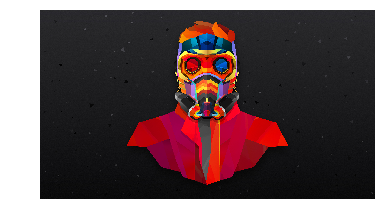

In [42]:
## construct the argument parser and parse the arguments when executing in cmdline
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True, help="Path to image")
#ap.add_argument("-c", "--clusters", required=True, type = int,
               #help="number of clusters")
#args = vars(ap.parse_args())

# number of clusters
clusters = 10

# load the image and do conversions
image = cv2.imread("example.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show image
plt.figure()
plt.axis("off")
plt.imshow(image)

# reshape the image to a list of pixels
image = image.reshape((image.shape[0] * image.shape[1],3))

In [43]:
# cluster the color in the image
clt = KMeans(n_clusters=clusters)
clt.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Counting the number of Pixels that belong to each cluster

The k-means algorithm assigns each pixel to its closest cluster.

Then we use *numLabels* and we define the number of different clusters that the histrogram has to be created. And then we create a histrogram of the number of pixels assigned to each cluster *hist*.

In [44]:
import numpy as np

def centroid_histrogram(clt):
    # number of clusters
    numLabels = np.arange(0, len(np.unique(clt.labels_))+1)
    # histrogram of the number of pixels
    (hist,_) = np.histogram(clt.labels_, bins = numLabels)
    
    # normalize the histrogram, such that it sums to one'
    hist = hist.astype("float")
    hist /= hist.sum()
    
    return hist

Now we will write a function *plt_color* which will plot the histrogram. This function takes two arguments *hist and list of centroids*.

In [45]:
def plot_color(hist, centroids):
    # init the rectable size
    bar = np.zeros((50,300,3), dtype="uint8")
    startX = 0
    
    # loop over the percentage of each color cluster and the color of eahc cluster
    for (percent, color) in zip(hist, centroids):
        endX = startX + (percent*300)
        cv2.rectangle(bar,(int(startX),0),(int(endX),50),
                          color.astype("uint8").tolist(),-1)
        startX = endX
    
    return bar

In [46]:
# checking the array dimensions

def valid_imshow_data(data):
    data = np.asarray(data)
    if data.ndim == 2:
        return True
    elif data.ndim == 3:
        if 3 <= data.shape[2] <= 4:
            return True
        else:
            print('The "data" has 3 dimensions but the last dimension '
                  'must have a length of 3 (RGB) or 4 (RGBA), not "{}".'
                  ''.format(data.shape[2]))
            return False
    else:
        print('To visualize an image the data must be 2 dimensional or '
              '3 dimensional, not "{}".'
              ''.format(data.ndim))
        return False

### Display the histrogram

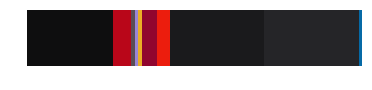

In [47]:
hist = centroid_histrogram(clt)
bar = plot_color(hist, clt.cluster_centers_)

# display
plt.figure()
plt.axis("off")
valid_imshow_data(bar)
plt.imshow(bar)
plt.show()